## Introduction
Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

## The Metric
The metric that is used to analyze the data is highest median income difference from 1999 to 2009. This metric will meaasure "thriving" neighborhoods in terms of income. The dataset that is used is [Neighborhoods with SNAP Data](https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6).

Below is the code used to measure and analyze the data.

## The Best Neighborhood
lalalalla

In [11]:
import pandas as pd
import math

data = pd.read_csv("data-set-5000.tsv", sep="\t")

data_array = []

for col in data:
    for i in range(0, len(pd.DataFrame(data)["SNAP_All_csv_2009_Median_Income"])):
        income_2009 = int(data["SNAP_All_csv_2009_Median_Income"][i])
        income_1999 = int(data["SNAP_All_csv_1999_Median_Inco_1"][i])

        data_array.append(data["Neighborhood_2010_HOOD"][i])
        data_array.append(income_2009 - income_1999)


highest_difference = -math.inf
highest_index = -1

for i in range(0, len(data_array), 2):
    if highest_difference < data_array[i + 1]:
        highest_difference = data_array[i + 1]
        highest_index = i

print(data_array[highest_index])
print(data_array[highest_index + 1])

South Shore
134059


## Data Visualization
The code below makes a bar graph that graphs the top 15 highest difference in income.

Text(0.5, 1.0, 'Difference in Median Income: 2009 vs 1999')

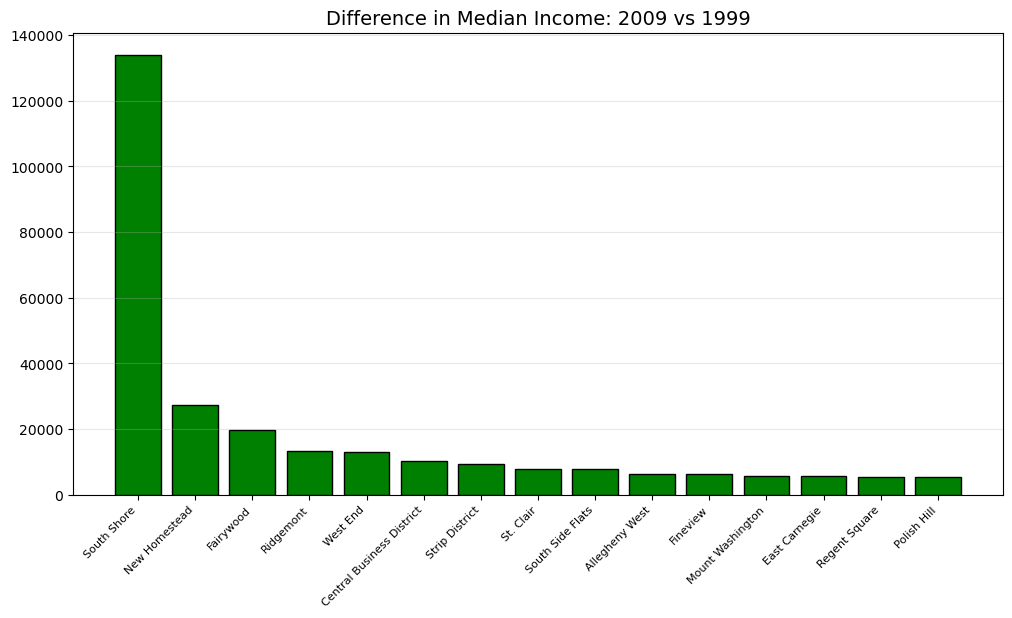

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv("data-set-5000.tsv", sep="\t")

col_1 = "Neighborhood_2010_HOOD"
col_2 = "SNAP_All_csv_2009_Median_Income"
col_3 = "SNAP_All_csv_1999_Median_Inco_1"

income_df = data[[col_1, col_2, col_3]].copy()
income_df.columns = ["Neighborhood", "Median_Income_2009", "Median_Income_1999"]

income_df = income_df.groupby('Neighborhood').mean().reset_index()
income_df["Difference"] = income_df["Median_Income_2009"] - income_df["Median_Income_1999"]

income_df_sorted = income_df.sort_values(by="Difference", ascending=False)

plot_data = income_df_sorted.head(15).copy()
colors = np.where(plot_data['Difference'] >= 0, "green", "red")
plt.figure(figsize=(12, 6))

plt.grid(axis="y", linestyle="-", alpha=0.3)
plt.bar(
    plot_data["Neighborhood"],
    plot_data["Difference"],
    color=colors,
    edgecolor='black'
)

plt.xticks(
    rotation=45,
    ha="right",
    fontsize=8
)
plt.title("Difference in Median Income: 2009 vs 1999", fontsize=14)

## Conclusion
lalaal